# Yeni Bölüm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head() #dataseti ekledik ve gösterdik

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df_small = df.drop(df.sample(n=90000, random_state=42).index)
df = df_small

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.083872,0.078600,0.039700,27.282199,5.524840,138.353800,0.086100
std,22.450162,0.269127,0.195263,6.539601,1.077101,40.535211,0.280526
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.650000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.560000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


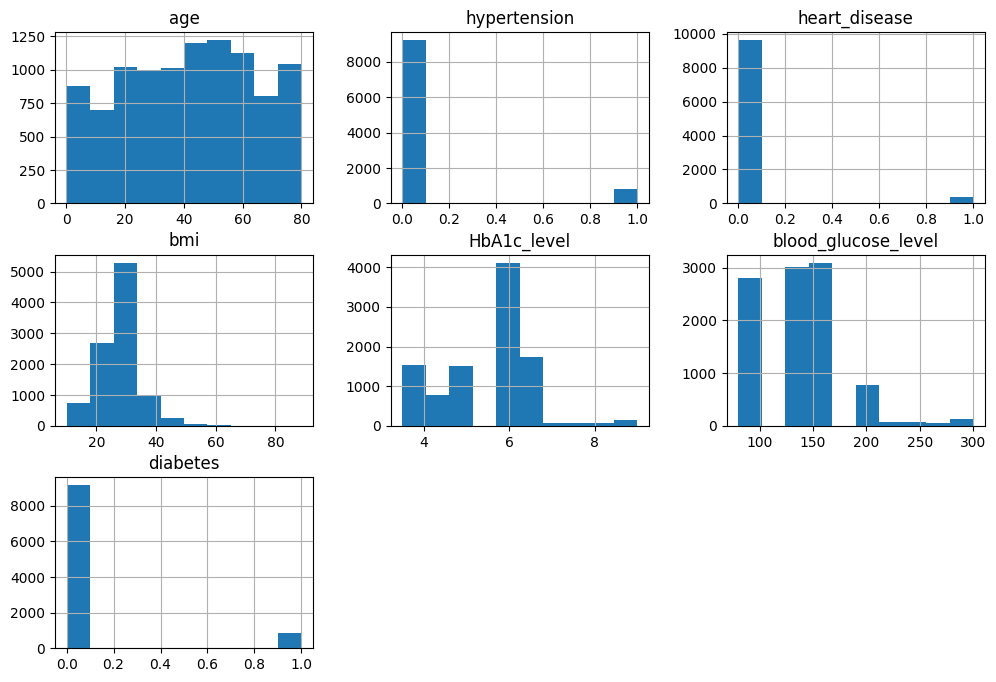

In [ ]:
df.hist(figsize=(12,8))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_enc = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_enc.fit_transform(df_encoded[column])

df = df_encoded # veride bulunann cinsiyet sütununu 0 1 2 olarak ayarladık

In [ ]:
corr = df.corr() # Verilerin birbiri ile ne kadar alakalı olduğunu ne kadar etkilediğini tablolaştırdık

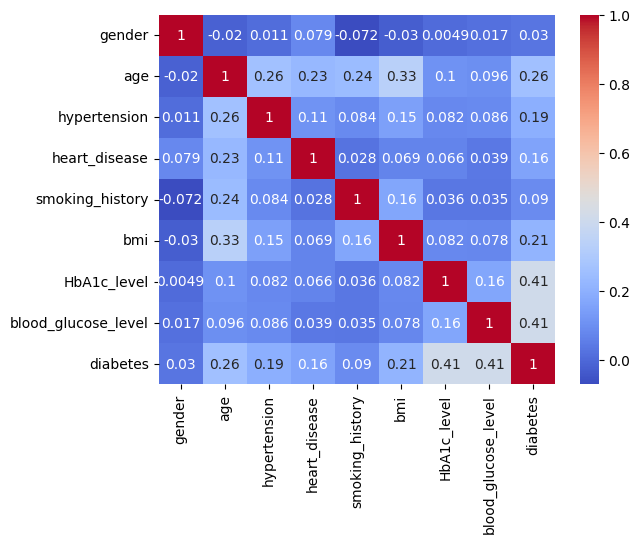

In [ ]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show() #Bu da yukarıdaki tabloya çıktıya göre bize bir ısı haritası çizdi

In [ ]:
X = df.drop(columns='diabetes') # Eğitmek için datasetimizden diabetes sütunun çıkarılmış halini kaydettik
y = df['diabetes'] # Burada direk diabetes sütununu kaydettik

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2) # Veriyi eğitmek ve test etmek için parçaladık %80 - %20

In [ ]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC(C=1, kernel='rbf', gamma=0.1))
])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9555

In [ ]:
parameters = {
    'C':[0.1,1,10],
    'kernel':['rbf','linear','sigmoid'],
    'gamma':['scale', 'auto',0.01,1]
}

In [ ]:
clf = SVC()

In [ ]:
grid = GridSearchCV(clf,parameters,cv=2,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01, 1],
                         'kernel': ['rbf', 'linear', 'sigmoid']})

In [ ]:
grid.best_estimator_

SVC(C=10, kernel='linear')

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid.best_score_

np.float64(0.9604999999999999)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1823
           1       0.95      0.53      0.68       177

    accuracy                           0.96      2000
   macro avg       0.95      0.76      0.83      2000
weighted avg       0.96      0.96      0.95      2000



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1818    5]
 [  84   93]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(C=1, kernel='rbf', gamma=0.1)
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}

for name, clf in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = acc


=== Logistic Regression ===
Accuracy: 0.9540
Confusion Matrix:
[[1807   16]
 [  76  101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1823
           1       0.86      0.57      0.69       177

    accuracy                           0.95      2000
   macro avg       0.91      0.78      0.83      2000
weighted avg       0.95      0.95      0.95      2000


=== Random Forest ===
Accuracy: 0.9685
Confusion Matrix:
[[1819    4]
 [  59  118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1823
           1       0.97      0.67      0.79       177

    accuracy                           0.97      2000
   macro avg       0.97      0.83      0.89      2000
weighted avg       0.97      0.97      0.97      2000


=== KNN ===
Accuracy: 0.9530
Confusion Matrix:
[[1806   17]
 [  77  100]]
Classification Report:
              precision   